In [6]:
import pandas as pd
filterList = ['年度','經常性薪資-女/男','專業人員-女/男','技術員及助理專業人員-女/男','事務支援人員-女/男',
 '服務及銷售工作人員-女/男','技藝_機械設備操作及組裝人員-女/男','基層技術工及勞力工-女/男']
data = pd.read_csv("HW18__Data.csv")
data.drop(columns=filterList,inplace=True)
data.replace(to_replace=r"…|—",value="0",regex=True,inplace=True )
data.rename(columns={'經常性薪資-薪資': '經常性',
'專業人員-薪資': '專業人員',
'技術員及助理專業人員-薪資': '技術員及助理',
'事務支援人員-薪資': '事務人員',
'服務及銷售工作人員-薪資': '服務銷售',
'技藝_機械設備操作及組裝人員-薪資': '機械設備操作',
'基層技術工及勞力工-薪資': '基層勞力'},inplace=True)
print(data.head())

         行業別    經常性   專業人員 技術員及助理   事務人員   服務銷售 機械設備操作   基層勞力
0   工業及服務業部門  27055  34003  28646  26068  25012  25338  22824
1       工業部門  26860  33788  28103  25906  25811  24919  22784
2   礦業及土石採取業  26170  35768  27744  23441  23625  26988  22440
3   石油及天然氣礦業  27696  37125  25313  23625  23625  23625      0
4  砂、石及黏土採取業  25661  30000  29185  23405      0  27629  22440


# 轉換與過濾
+ 轉換：
  + Group 或 column 可以透過 transform 函數進行轉換，返回索引的對象的大小與被分組的大小相同。
+ 過濾：
  + 依據 filter( ) 函數進行篩選與過濾的動作並傳回資料。

In [7]:
import pandas as pd
pl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders','LuLu'],
         'Rank': [1, 2, 2, 3, 3,4 ,1,1,2,4,1,2,4],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017,2018],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690,700]}
df = pd.DataFrame(pl_data)
print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
12    LuLu     4  2018     700


## 選組與聚合

In [18]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby("Year")
print(list(grouped))
print(grouped.get_group(2017))
print(grouped["Points"].agg(np.mean))
print(grouped["Points"].agg("mean"))
print(grouped["Points"].agg(np.size))
print(grouped["Points"].agg([np.sum,np.mean,np.std]))

[(2014,      Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701), (2015,       Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    Kings     4  2015     812
10  Royals     1  2015     804), (2016,      Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694), (2017,       Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690)]
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
Year
2014    4
2015    4
2016    2
2017    2
Name: Points, dtype: int64
       sum    mean        std
Year                         
2014  3181  795.25  87.439026
2015  3078  769.50  65.035888
20

## 轉換與過濾

In [23]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Team')
print (df1.df)
print(grouped.first())#取得每個群組的第一個值
print("========================")
score = lambda x:x * 10
print(grouped.transform(score))
print("==============================")
print(df1.df.groupby('Team').filter(lambda x:len(x) >= 3))#群組數量為>=3的列出


      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
    Rank   Year  Points
0     10  20140    8760
1     20  20150    7890
2     20  20140    8630
3     30  20150    6730
4     30  20140    7410
5     40  20150    8120
6     10  20160    7560
7     10  20170    7880
8     20  20160    6940
9     40  20140    7010
10    10  20150    8040
11    20  20170    6900
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
4    Kings     3  2014     741

# 進階圖表功能
+ pandas 內附簡易的 matplot 繪圖工具，可以讓您方便快速產生結果，但如果您的環境內已經執行 matplot，那 pandas 的圖表也必須透過 matplot 的物件執行 show 方式才能呈現。
+ 折線圖是最基本產生圖表的方式。

                   A         B         C         D
2018-01-01 -1.161074  0.666437 -1.142758  0.132875
2018-01-02  1.184036  1.476166  0.597821  0.525763
2018-01-03  0.325141 -0.304567 -0.712038 -1.520745
2018-01-04 -0.686464 -1.058532 -0.008490 -0.752181
2018-01-05  0.233343  1.046655 -0.405272  0.189920
2018-01-06 -0.726935 -1.999475 -0.312020 -1.392853
2018-01-07 -0.863528 -0.628222 -1.126187 -1.196148
2018-01-08 -1.167175 -0.272400 -0.935242 -0.653683
2018-01-09  0.432087 -1.495375  0.218465 -1.610533
2018-01-10  1.286444  1.401268 -0.272481 -0.852286


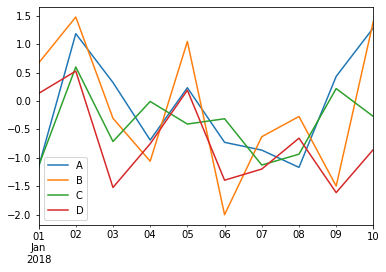

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame(np.random.randn(10,4),index = pd.date_range('1/1/2018',periods=10),columns=list('ABCD'))
print(df)
df.plot()
plt.show()

## 進階圖表-兩條曲線

           population       area
London        8615246  1572000.0
Berlin        3562166   891850.0
Madrid        3165235   605770.0
Rome          2874038  1285000.0
Paris         2273305   105400.0
Vienna        1805681   414600.0
Bucharest     1803425   228000.0
Hamburg       1760433   755000.0
Budapest      1754000   525200.0
Warsaw        1740119   517000.0
Barcelona     1602386   101900.0
Munich        1493900   310400.0
Milan         1350680   181800.0


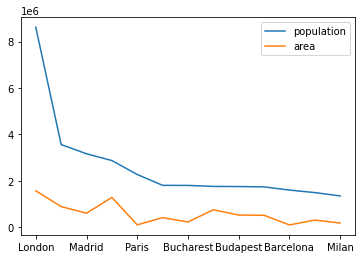

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
                   "Paris", "Vienna", "Bucharest", "Hamburg",
                   "Budapest", "Warsaw", "Barcelona","Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,1350680],
          "area" : [1572, 891.85, 605.77, 1285,
                    105.4, 414.6, 228, 755, 525.2, 517, 101.9, 310.4,181.8]
}
city_frame = pd.DataFrame(cities,columns=["population","area"],index =cities["name"] )
city_frame["area"] *= 1000
print(city_frame)
city_frame.plot()
plt.show()

# 子圖表 (1)
+ 一個 Figure 對象可以包含多個子圖 (Axes)，預設三個參數：
  + num_rows：幾個 rows。
  + num_cols：幾個 columns。
  + plot_num：代表第幾張圖表。
+ 然後按照從左到右，從上到下的順序對每個子區域進行編號，左上的子區域的編號為 1。
+ Plot_num 參數指定創建的 Axes 對象所在的區域。
+ 如果 numRows ＝ 2、numCols ＝ 3，那整個繪製圖表樣式為 2×3 的圖片區域,用坐標表示為
  + (1, 1), (1, 2), (1, 3)
  + (2, 1), (2, 2), (2, 3)
+ 當 plotNum ＝ 3 時,表示的坐標為 (1, 3)，即第一 row 第三 column 的子圖。
+ 如果 numRows、numCols 和 plotNum 這三個數都小於 10 的話，可以把它們縮寫為一個整數，例如 subplot(232) 和 subplot(2,3,2) 是相同的。
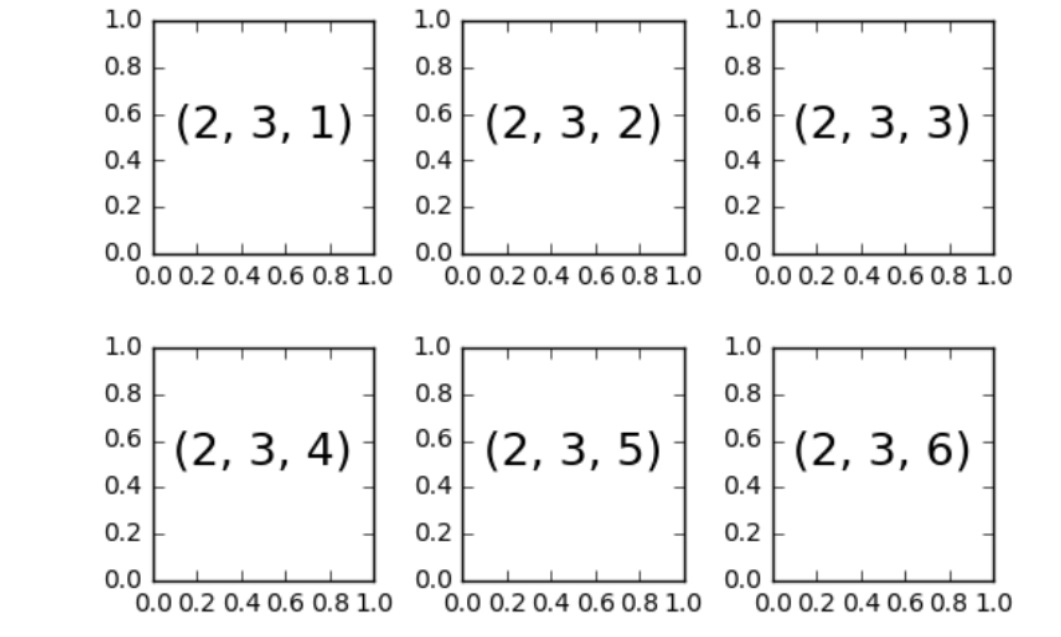

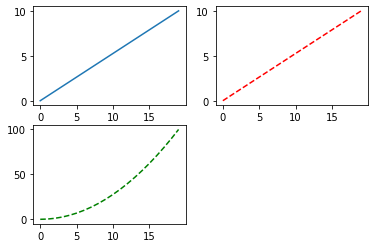

In [33]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0,20.0,1)
s = np.linspace(0,10,20)
plt.subplot(2,2,1)
plt.plot(t,s)
plt.subplot(2,2,2)
plt.plot(t,s,'r--')
plt.subplot(223)
plt.plot(t,s**2,'g--')
plt.show()

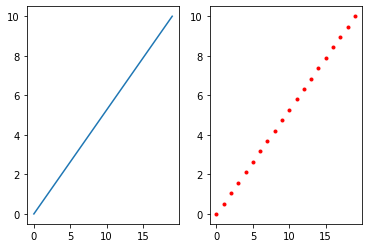

In [35]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0,20.0,1)
s = np.linspace(0,10,20)
plt.subplot(1,2,1)
plt.plot(t,s)
plt.subplot(1,2,2)
plt.plot(t,s,'r.')
plt.show()

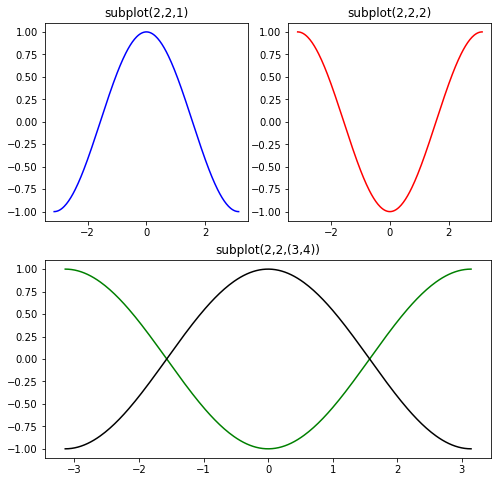

In [41]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi,np.pi,256)
Y = np.cos(X)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(X,Y,color="blue")
plt.title("subplot(2,2,1)")
plt.subplot(2,2,2)
plt.plot(X,Y*-1,color="red")
plt.title("subplot(2,2,2)")
plt.subplot(2,2,(3,4))
plt.plot(X,Y*-1,color="green")
plt.plot(X,Y,color="black")
plt.title('subplot(2,2,(3,4))')
plt.show()

# 分析與圖表顯示 1- 查看數值與型態
+ 讀取 salesv2.csv，並請將日期資料視為字串，方便之後的重新取樣。
+ 我們可以做一些快速分析，可再查看單價 (unit price)，可知道平均值與最大最小值。
+ 接著透過 dtypes 的輸出確保數字資料的格式是浮點數或整數。
+ describe 可快速查看count mean std min 等綜合資訊

In [42]:
import pandas as pd
sales=pd.read_csv("salesv2.csv",parse_dates=['date'])# 將date轉換成日期格式
print(sales.head( ))
print("----------1-----------")
print(sales.describe( ))
print("----------2-----------")
print(sales['unit price'].describe( ))
print("----------3-----------")
print(sales.dtypes)
print("----------4-----------")

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.

## 分析與圖表顯示 2- 分組與 Bar 顯示
+ 首先我們只取出 name、 ext price 與 date 三個欄位分析。
+ 為了理解購買模式，我們依據名稱 (name) 對所有客戶進行分組，再接著查看每個客戶的消費次數情況。
+　資料再以 Bar 方式顯示!

                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar     289.92 2014-03-01 10:51:24
3                  Waters-Walker     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    1793.52 2014-01-03 08:14:27
name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59

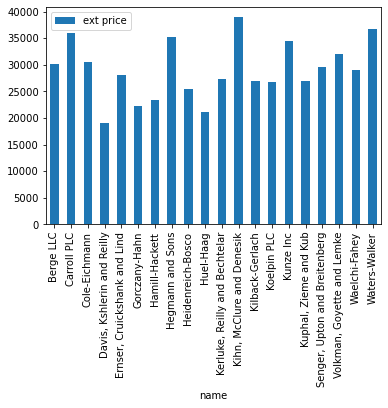

In [46]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head())
customers_group = customers.groupby("name")
print(customers_group.size())
sales_totals = customers_group.sum()
print(sales_totals)
sales_totals.plot(kind='bar')
plt.show()

## 分析與圖表顯示 3- Bar 修改
+ 這張圖表再做一些調整，我們可以使它更有影響力：
  + 資料進行排序
  + 刪除圖例
  + 添加標題
  + 標記軸
+ 圖表將可顯示最大客戶與最小客戶之間差異。

                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar     289.92 2014-03-01 10:51:24
3                  Waters-Walker     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    1793.52 2014-01-03 08:14:27
name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59

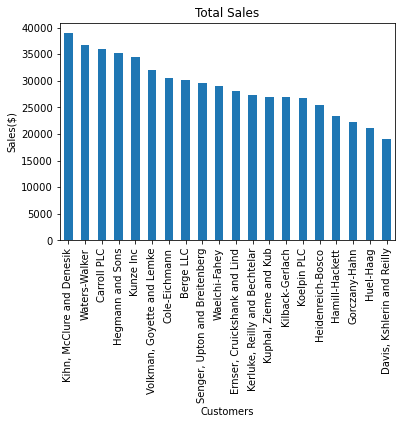

In [49]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head())
customers_group = customers.groupby("name")
print(customers_group.size())
sales_totals = customers_group.sum()
print("===================================")
print(sales_totals.sort_values(by="ext price",ascending=False))#ascending=False 大到小排序
print("===================================")
my_plot = sales_totals.sort_values(by="ext price",ascending=False).plot(kind="bar",legend=None,title="Total Sales")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales($)")
plt.show()

## 分析與圖表顯示 4- 堆疊長條圖
+ 再請試著將銷售部分以類別細分。
+ 再將類別分組後的資料以堆疊長條圖方式顯示。

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

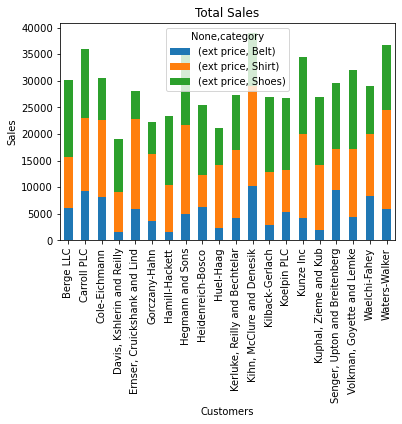

In [54]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head())
print("===============================")
category_group = customers.groupby(['name','category']).sum()
print(category_group.head())
print("===============================")
print(category_group.unstack().head())
print("===============================")
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
plt.show()

## 分析與圖表顯示 5- 堆疊長條圖調整
+ 圖例於視覺上造成阻礙。
+ 堆疊長條圖顯示方式略作調整。
+ loc編號
|功能         |編號|
|-------------|-----|
|最好(右上)預設| 0  |
|右上方	   | 1   |
|左上	       | 2|
|左下角	      | 3|
|右下	       | 4|
|對	        | 5|
|中左	       | 6|
|中右	       | 7|
|下中心	      | 8|
|上中	       | 9|
|中央	       | 10|

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

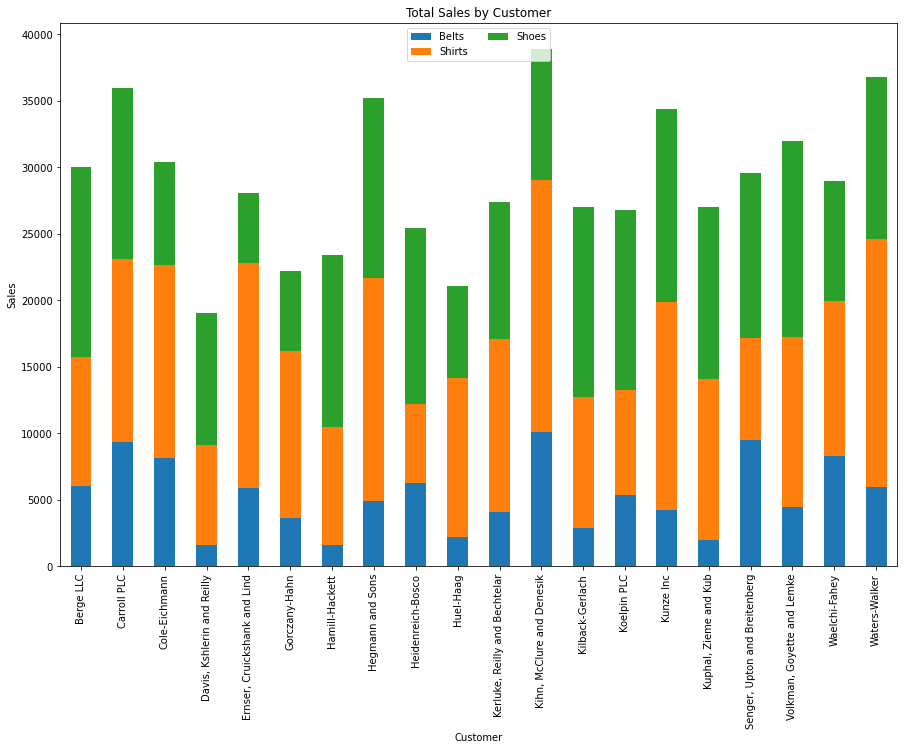

In [57]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head( ))
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head( ))
print(category_group.unstack( ).head( ))
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(15,10))
my_plot.set_xlabel("Customer")
my_plot.set_ylabel("Sales")
my_plot.legend(["Belts","Shirts","Shoes"],loc=9,ncol=2) #ncol=2 美欄顯示2組
plt.show()

## 設計直方圖
+ 已經知道最大的客戶以及他們如何購買產品，我們可能希望更詳細地了解購買模式。
+ 讓我們再看一下數據並試著看看個人購買量有多大。
+ 直方圖允許我們將購買分組在一起，以便我們可以看到客戶交易的大小。
+ 我們可以建立一個包含 20 個資料的直方圖來顯示購買模式的分佈。

ext price    13
dtype: int64


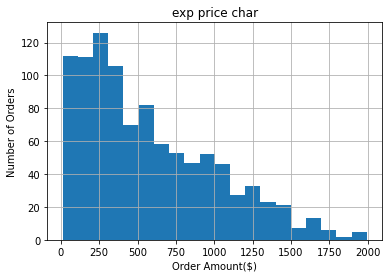

In [62]:
import matplotlib.pyplot as plt
import pandasplot009a
sales_exp_price = pandasplot009a.sales[['ext price']]
print(sales_exp_price.query("`ext price` < 2000 & `ext price` >= 1750").count())
exp_price_plot = sales_exp_price['ext price'].hist(bins=20)
exp_price_plot.set_title("exp price char")
exp_price_plot.set_xlabel("Order Amount($)")
exp_price_plot.set_ylabel("Number of Orders")
plt.show()

## 日期重新採樣
+ 讓我們從另外一個角度，查看銷售額隨著時間的推移是否會更忙。
+ 我們按日期分析資料，我們需要使用日期列作為索引  。
+ 我們想要按月份查看資料，我們可以重新採樣並總結。
+ 我們可以使用 "M" 作為重新採樣的時間段，代表資料應在月底重新採樣。

   ext price                date
0     578.24 2014-09-27 07:13:03
1    1018.78 2014-07-29 02:10:44
2     289.92 2014-03-01 10:51:24
3     413.40 2013-11-17 20:41:11
4    1793.52 2014-01-03 08:14:27
                     ext price
date                          
2014-09-27 07:13:03     578.24
2014-07-29 02:10:44    1018.78
2014-03-01 10:51:24     289.92
2013-11-17 20:41:11     413.40
2014-01-03 08:14:27    1793.52
==================M===================
            ext price
date                 
2013-10-31   14085.27
2013-11-30   44932.78
2013-12-31   57752.23
2014-01-31   53161.35
2014-02-28   51783.56


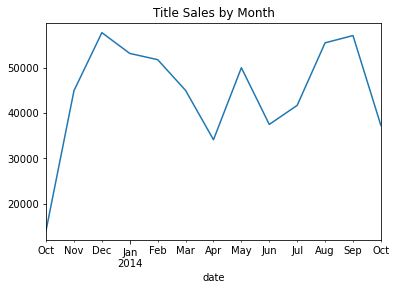

In [72]:
import matplotlib.pyplot as plt
import pandasplot009a
sales_exp_price = pandasplot009a.sales[['ext price','date']]
print(sales_exp_price.head())
print("=====================================")
sales_exp_price = sales_exp_price.set_index('date')
print(sales_exp_price.head())
print("==================M===================")
print(sales_exp_price.resample('M').sum().head())
print("======================================")
sales_exp_price_plot = sales_exp_price.resample('M').sum().plot(title="Title Sales by Month",legend=None)
plt.show()
fig = sales_exp_price_plot.get_figure()
fig.savefig("total-sales20221110.png")